In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="gHANp2vsdcbZgpkd2rcs")
project = rf.workspace("plate-detection-hhwwz").project("plate-text-detection")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to plate-text-detection-4 in yolov8:: 100%|██████████| 3991/3991 [00:00<00:00, 4328.90it/s]


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.4/616.4 kB 7.7 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/plate-text-detection-4/data.yaml', epochs=150, imgsz=(640, 210))


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

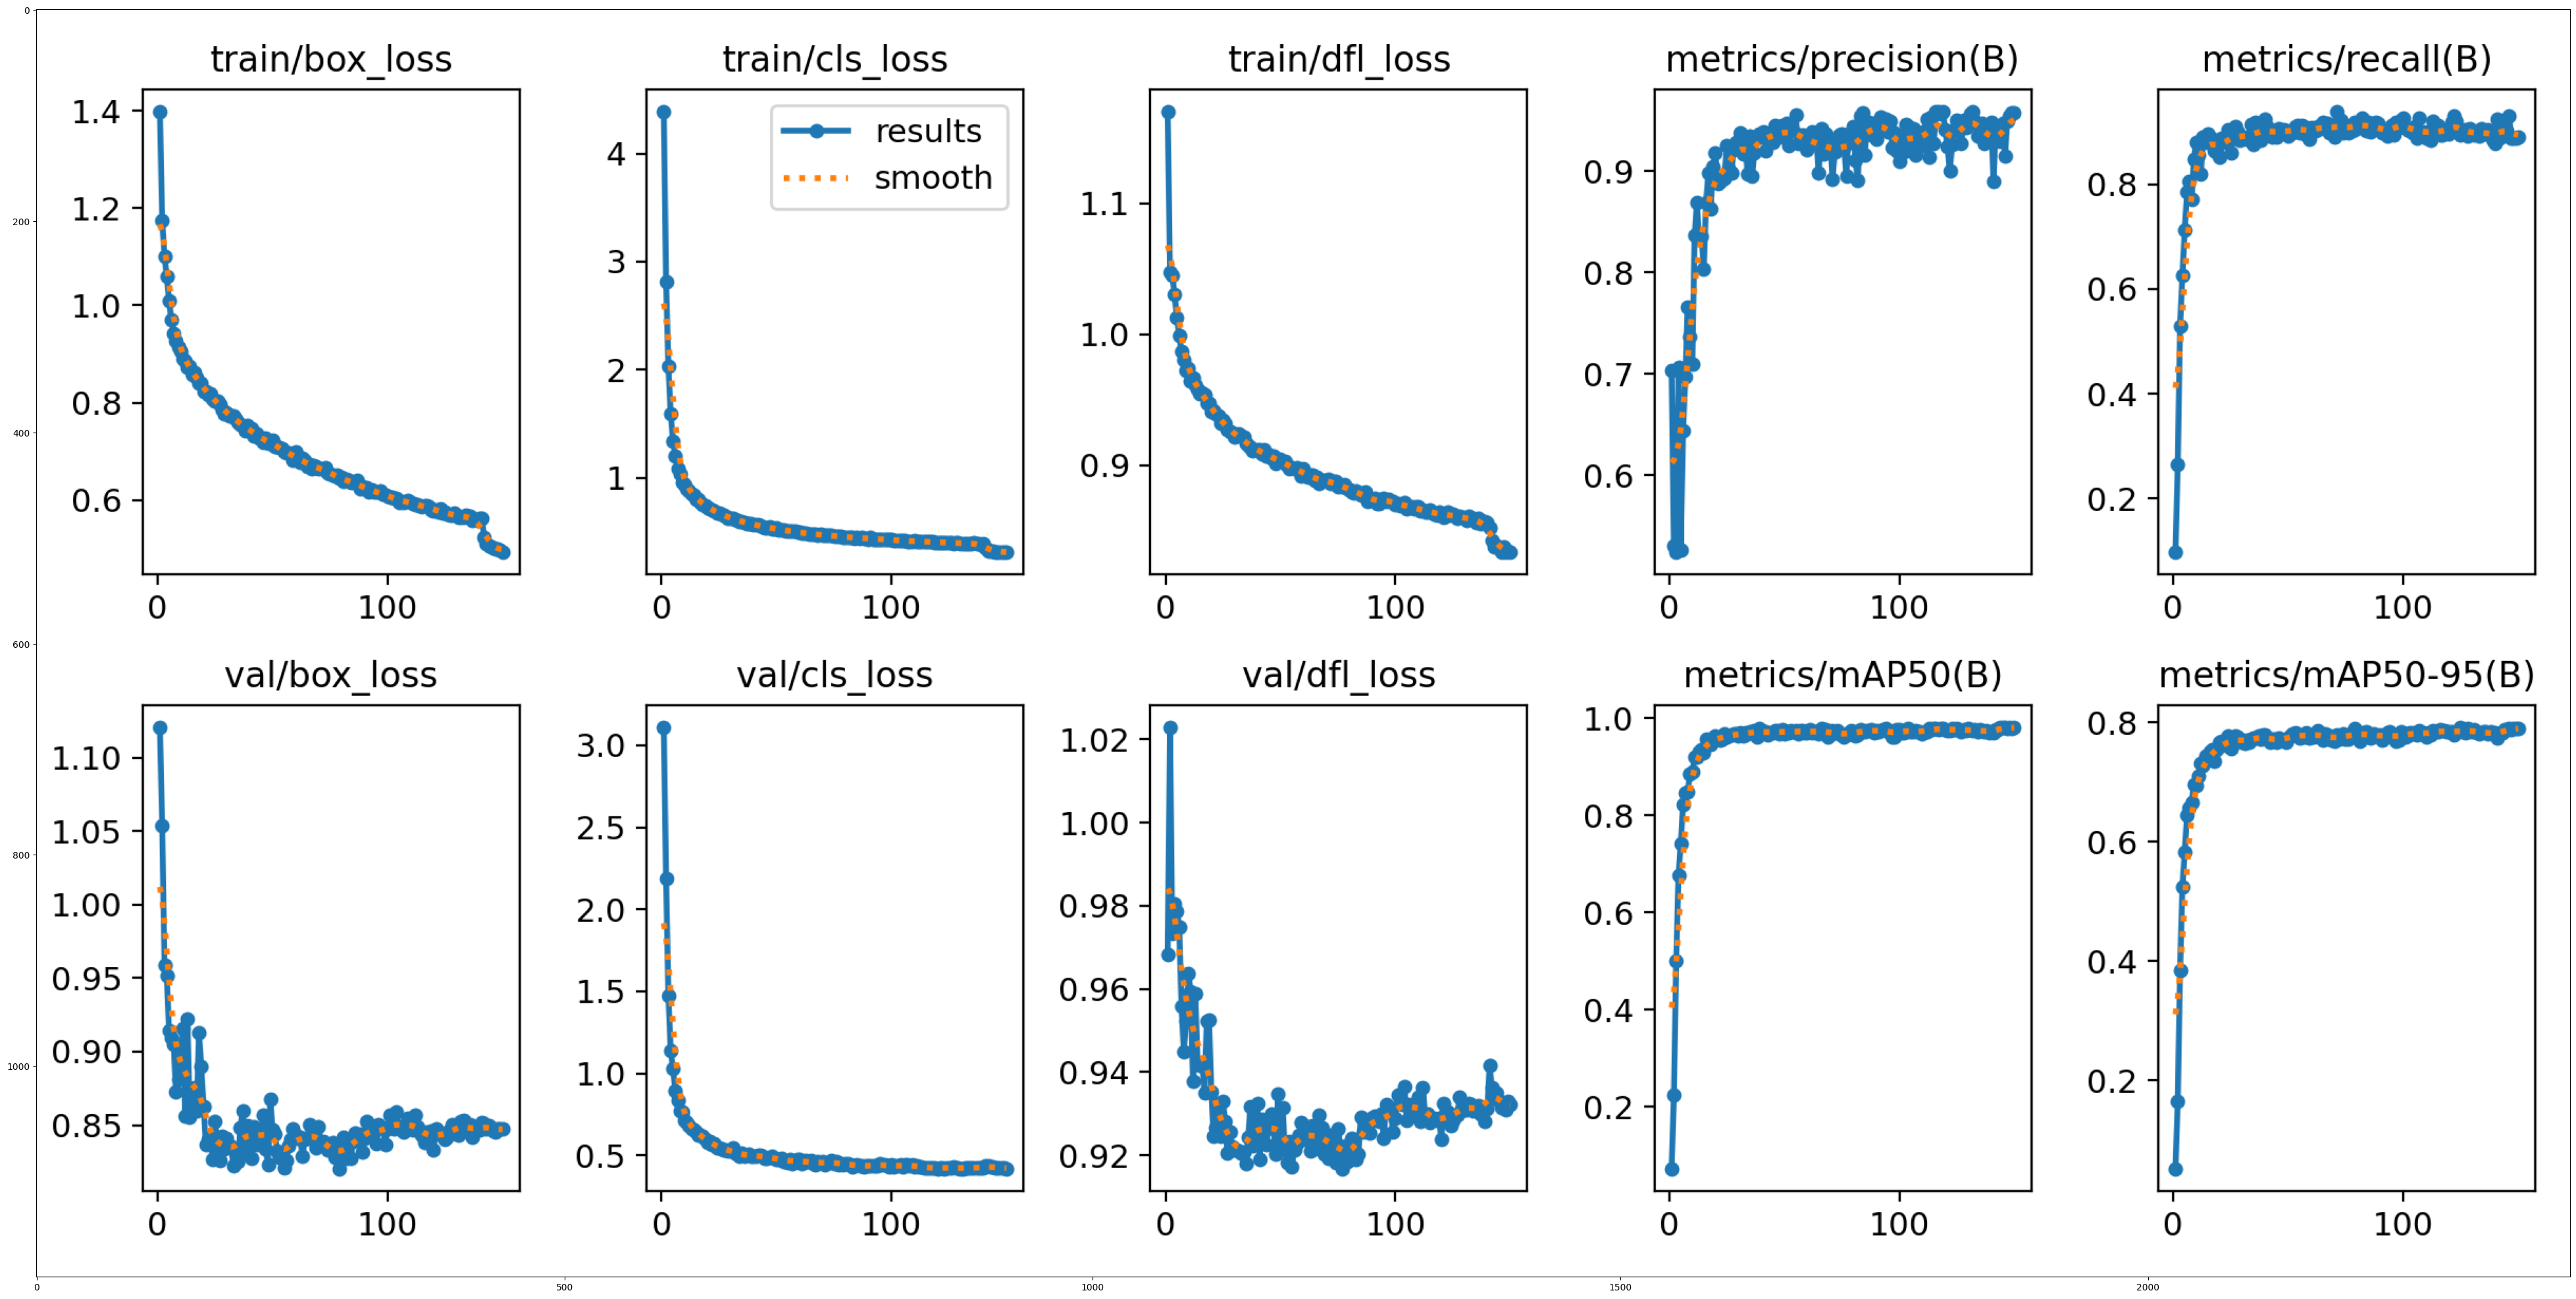

In [6]:
import matplotlib.pyplot as plt
result_plot = plt.imread("/content/runs/detect/train/results.png")
plt.figure(figsize=(50, 25))
plt.imshow(result_plot)
plt.show()

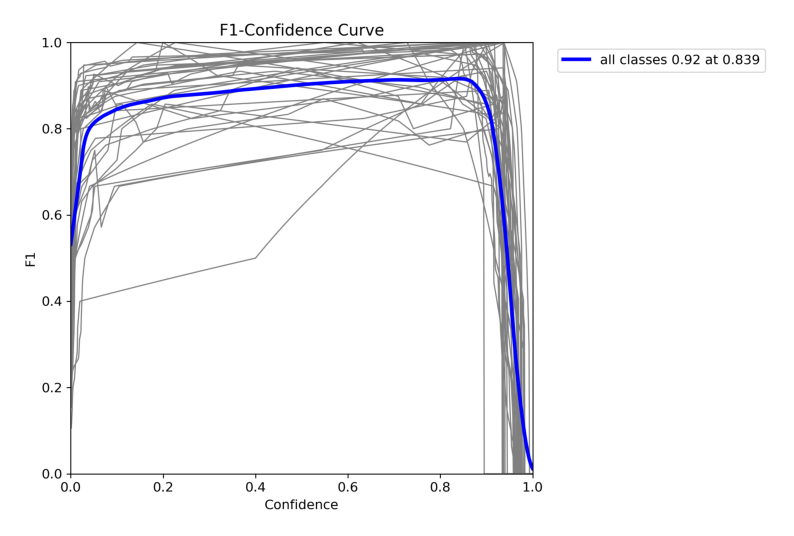

In [7]:
eval_list = ["/content/runs/detect/train/F1_curve.png", "/content/runs/detect/train/PR_curve.png", "/content/runs/detect/train/P_curve.png",
             "/content/runs/detect/train/R_curve.png", "/content/runs/detect/train/confusion_matrix.png",
             "/content/runs/detect/train/confusion_matrix_normalized.png"]

f1_curve = plt.imread(eval_list[0])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(f1_curve)

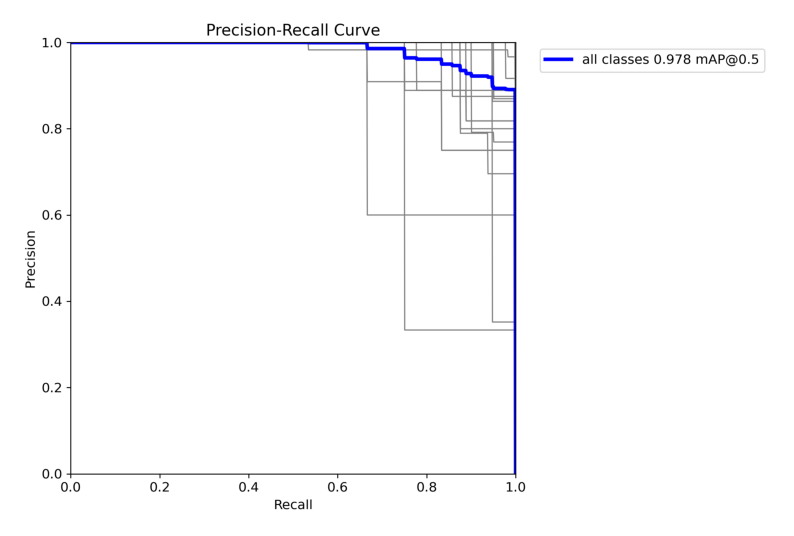

In [8]:
pr_curve = plt.imread(eval_list[1])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(pr_curve)

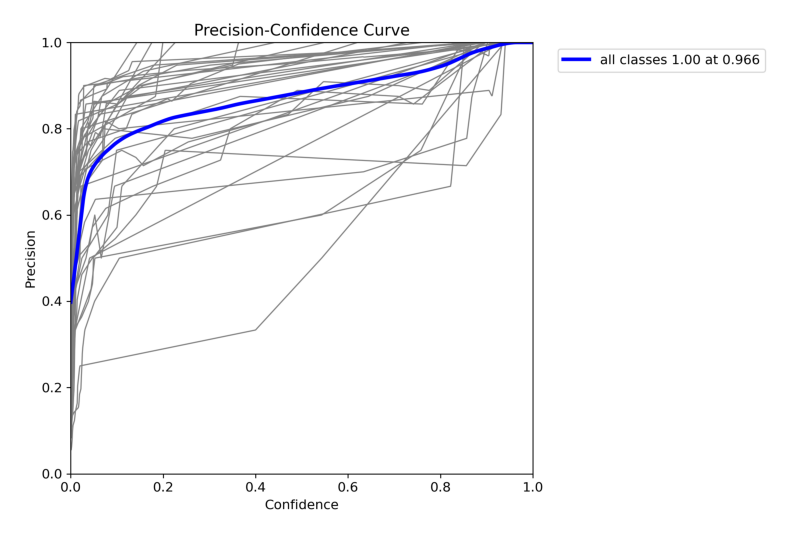

In [9]:
p_curve = plt.imread(eval_list[2])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(p_curve)

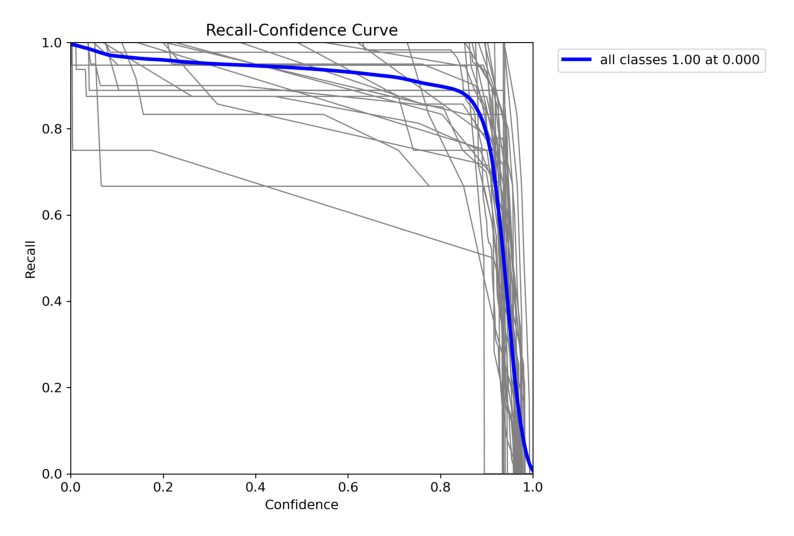

In [10]:
r_curve = plt.imread(eval_list[3])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(r_curve)

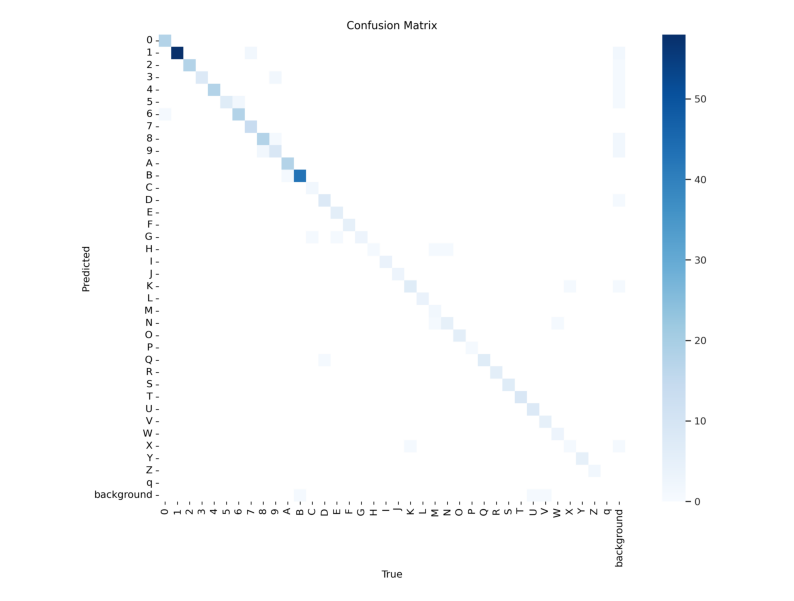

In [11]:
cm = plt.imread(eval_list[4])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm)

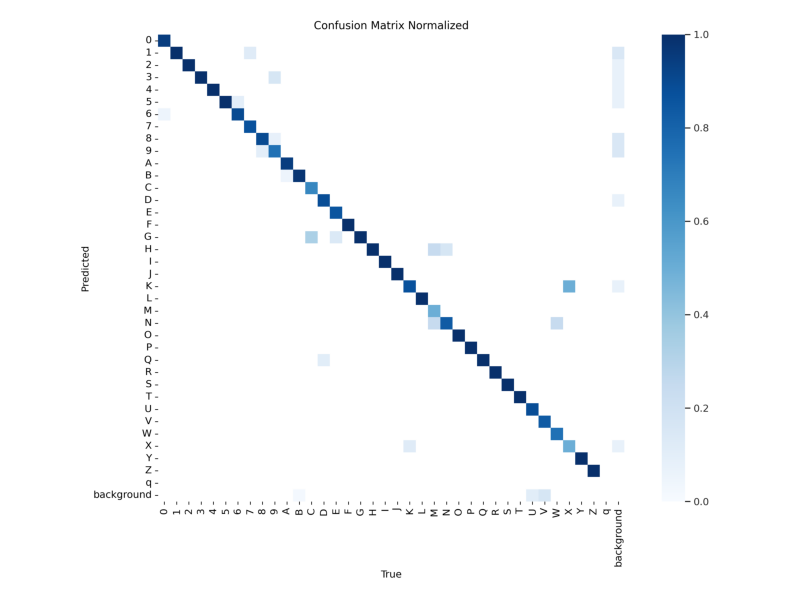

In [12]:
cm_n = plt.imread(eval_list[5])
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cm_n)

In [13]:
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3012863 parameters, 0 gradients
val: Scanning /content/plate-text-detection-4/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]
                   all         50        380       0.95      0.895      0.977       0.79
                     0         50         19      0.995      0.947      0.988      0.817
                     1         50         58      0.982      0.983      0.987      0.723
                     2         50         18      0.996          1      0.995      0.837
                     3         50          8      0.919       0.75      0.967      0.794
                     4         50         18          1      0.951      0.995      0.779
                     5      

array([    0.81684,     0.72265,     0.83738,     0.79364,     0.77948,      0.8167,     0.80543,     0.74316,     0.81194,      0.7847,     0.74321,     0.80245,      0.7585,     0.85982,     0.87077,     0.75924,       0.796,      0.8955,      0.8733,     0.86352,     0.85396,     0.79359,     0.66414,     0.70393,
           0.74191,      0.6965,     0.82441,     0.83938,      0.7862,     0.85835,     0.74612,     0.71588,     0.73593,     0.74706,      0.7187,      0.8955,     0.79044])

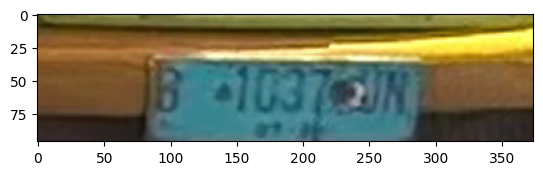

In [45]:
import cv2
image_test = cv2.imread("/content/Test-Data/DataTest27.png")
plt.imshow(image_test)

In [46]:
def prediksi(image, model, conf_thresh=0.0):
  results = model.predict(image)
  for result in results:
    boxes = result.boxes.cpu().numpy() # get boxes on cpu in numpy
    for box in boxes: # iterate boxes
      r = box.xyxy[0].astype(int) # get corner points as int
      print(r) # print boxes
      cv2.rectangle(image, r[:2], r[2:], (0,255,0), 2) # draw boxes on image
      cls = result.names[int(box.cls[0])]
      cv2.putText(image, str(cls), (r[0] + 5, r[1] - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
  plt.imshow(image)


0: 192x640 1 0, 1 1, 1 3, 1 7, 1 B, 1 N, 1 U, 16.2ms
Speed: 1.6ms preprocess, 16.2ms inference, 2.2ms postprocess per image at shape (1, 3, 192, 640)


[205  39 221  74]
[260  41 279  78]
[164  39 182  74]
[183  39 202  74]
[ 89  38 110  76]
[149  38 161  75]
[243  40 259  76]


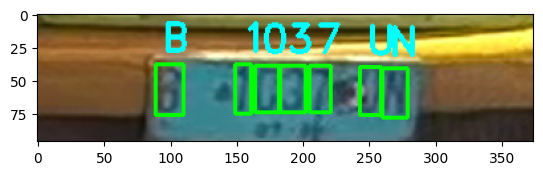

In [47]:
img_test = image_test.copy()
prediksi(img_test, model)

In [48]:
def prediksi_(image, model, conf_thresh=0.0):
  results = model.predict(image)
  clas = []
  boxx = []
  for result in results:
    boxes = result.boxes.cpu().numpy()
    for box in boxes:
      r = box.xyxy[0].astype(int)
      cls = result.names[int(box.cls[0])]
      clas.append(cls)
      boxx.append(r[0])
  boxx_sort = sorted(boxx)
  sorted_clas = [x for _, x in sorted(zip(boxx, clas))]
  kelas = ''.join(sorted_clas)
  plt.title("Prediksi: "+kelas)
  plt.imshow(image)
  return kelas


0: 192x640 1 0, 1 1, 1 3, 1 7, 1 B, 1 N, 1 U, 16.0ms
Speed: 1.5ms preprocess, 16.0ms inference, 2.2ms postprocess per image at shape (1, 3, 192, 640)


'B1037UN'

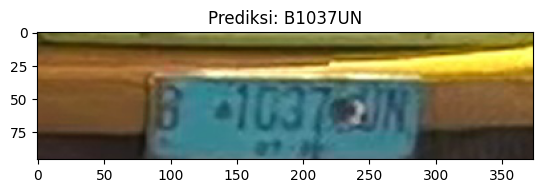

In [49]:
img = image_test.copy()
prediksi_(img, model)